In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.datasets import boston_housing


2025-05-15 11:05:44.349756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747296344.475793    7462 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747296344.511657    7462 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-15 11:05:44.728543: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)

In [4]:

model = keras.Sequential([
    layers.Dense(32, activation="sigmoid"),

    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="SGD",
              loss="categorical_crossentropy", 
              metrics=["accuracy", "mse"])

I0000 00:00:1747296353.642952    7462 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2169 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)


Epoch 1/10


I0000 00:00:1747296355.332020    8525 service.cc:148] XLA service 0x7f1124019770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747296355.332095    8525 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-15 11:05:55.381326: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747296355.447834    8525 cuda_dnn.cc:529] Loaded cuDNN version 90501


 69/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1038 - loss: 2.4488 - mse: 0.0929

I0000 00:00:1747296357.824645    8525 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2660 - loss: 2.2593 - mse: 0.0889
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6794 - loss: 1.7830 - mse: 0.0763
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7428 - loss: 1.4599 - mse: 0.0647
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7851 - loss: 1.2213 - mse: 0.0547
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 1.0478 - mse: 0.0469
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8240 - loss: 0.9211 - mse: 0.0410
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8335 - loss: 0.8268 - mse: 0.0365
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8434 - loss: 0.7517 - mse: 0.0330
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8514 - loss: 0.6955 - mse: 0.0303
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 - loss: 0.6503 - mse: 0.0282


<function matplotlib.pyplot.show(close=None, block=None)>

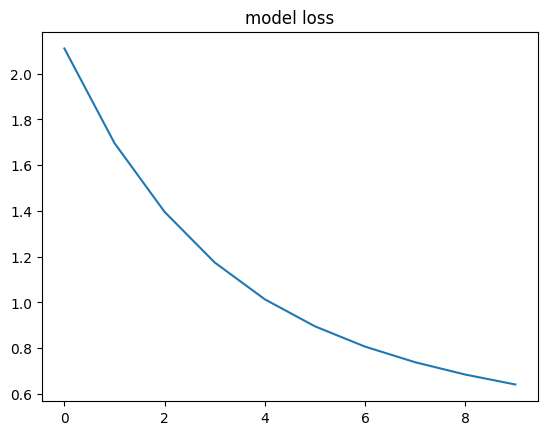

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title("model loss")
plt.show

In [ ]:
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Evaluate the model on test data
test_results = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"Test loss: {test_results[0]}")
print(f"Test accuracy: {test_results[1]}")
print(f"Test MSE: {test_results[2]}")


313/313 - 1s - 3ms/step - accuracy: 0.8653 - loss: 0.6129 - mse: 0.0266
Test loss: 0.6129303574562073
Test accuracy: 0.8652999997138977
Test MSE: 0.02664114162325859


In [ ]:

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print("x_train shape before normalization:", x_train.shape)
print("y_train shape:", y_train.shape)

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print("x_train shape after normalization and conversion:", x_train.shape)

x_train shape before normalization: (404, 13)
y_train shape: (404,)
x_train shape after normalization and conversion: (404, 13)


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer="SGD",
    metrics=['mae', 'mse']
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    batch_size=16,
    verbose=2
)

eval_results = model.evaluate(x_test, y_test)
print(f"Test loss (MSE): {eval_results[0]:.4f}")
print(f"Test MAE: {eval_results[1]:.4f}")
print(f"Test MSE: {eval_results[2]:.4f}")

Epoch 1/200
26/26 - 1s - 42ms/step - loss: 112.9712 - mae: 6.9628 - mse: 112.9712 - val_loss: 27.3403 - val_mae: 4.0432 - val_mse: 27.3403
Epoch 2/200
26/26 - 0s - 4ms/step - loss: 29.6415 - mae: 3.7084 - mse: 29.6415 - val_loss: 23.6868 - val_mae: 3.7569 - val_mse: 23.6868
Epoch 3/200
26/26 - 0s - 4ms/step - loss: 26.1181 - mae: 3.4966 - mse: 26.1181 - val_loss: 21.4072 - val_mae: 3.4054 - val_mse: 21.4072
Epoch 4/200
26/26 - 0s - 4ms/step - loss: 24.6080 - mae: 3.3859 - mse: 24.6080 - val_loss: 21.7118 - val_mae: 3.3509 - val_mse: 21.7118
Epoch 5/200
26/26 - 0s - 4ms/step - loss: 23.5760 - mae: 3.3597 - mse: 23.5760 - val_loss: 22.9697 - val_mae: 3.4348 - val_mse: 22.9697
Epoch 6/200
26/26 - 0s - 4ms/step - loss: 22.5353 - mae: 3.3218 - mse: 22.5353 - val_loss: 22.7805 - val_mae: 3.5670 - val_mse: 22.7805
Epoch 7/200
26/26 - 0s - 4ms/step - loss: 21.7141 - mae: 3.3730 - mse: 21.7141 - val_loss: 23.9850 - val_mae: 3.4802 - val_mse: 23.9850
Epoch 8/200
26/26 - 0s - 4ms/step - loss: 21.